### Ch14_2_1.py
* regularizers

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import regularizers

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu",
                 kernel_regularizer=regularizers.l2(0.02),
                 bias_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.02),
                 bias_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=34, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_3_2.py
* optimizers

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import optimizers

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
opt_sgd = optimizers.SGD(lr=0.05,decay=1e-6, momentum=.09)
model.compile(loss="categorical_crossentropy", optimizer=opt_sgd,
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=40, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_3_2a.py

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import optimizers

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
opt_adam = optimizers.Adam(lr=0.001,decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_adam,
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=13, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_3_2b.py

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import optimizers

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
opt_rms = optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_rms,
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=13, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_4_2.py
* BatchNormalization in MLP
* Dense(units, activation=None, use_bias=False)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation

seed = 7
np.random.seed(seed)
# 載入Titanic的訓練和測試資料集
df_train = pd.read_csv("./titanic_train.csv")
df_test = pd.read_csv("./titanic_test.csv")
dataset_train = df_train.values
dataset_test = df_test.values
# 分割成特徵資料和標籤資料
X_train = dataset_train[:, 0:9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, 0:9]
Y_test = dataset_test[:, 9]
# 特徵標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)
# 定義模型
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(11, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
print("Training ...")
history = model.fit(X_train, Y_train, verbose=2,
                    validation_data=(X_test, Y_test), 
                    epochs=34, batch_size=10)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "r--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_4_3.py
* BatchNormalization in CNN
* Conv2D(activation=None, use_bias=False)

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization, Activation
from keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=20, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()  # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
# 訓練模型
from keras.callbacks import Callback
# 繼承 Callback 類別建立 fitHistory 類別
class fitHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.acc.append(logs.get("accuracy"))
        self.losses.append(logs.get('loss'))
# 建立 fitHistory 物件
history = fitHistory()
model.fit(X, Y, batch_size=64, epochs=5, verbose=0,
          callbacks=[history])

print("筆數: ", len(history.acc))
print(history.acc)
print("筆數: ", len(history.losses))
print(history.losses)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
筆數:  60
[0.53125, 0.5390625, 0.5572917, 0.5546875, 0.5125, 0.5390625, 0.52678573, 0.5390625, 0.5295139, 0.546875, 0.53125, 0.5338542, 0.5, 0.6015625, 0.640625, 0.6484375, 0.609375, 0.6145833, 0.5870536, 0.6015625, 0.6128472, 0.609375, 0.60227275, 0.5989583, 0.65625, 0.6484375, 0.6302083, 0.57421875, 0.58125, 0.578125, 0.59598213, 0.5917969, 0.5729167, 0.58125, 0.58522725, 0.58463544,

### Ch14_5a.py

Epoch 00021: early stopping
690/690 [==============================] - 0s 9us/step
訓練資料集的準確度 = 0.77
78/78 [==============================] - 0s 24us/step
測試資料集的準確度 = 0.73


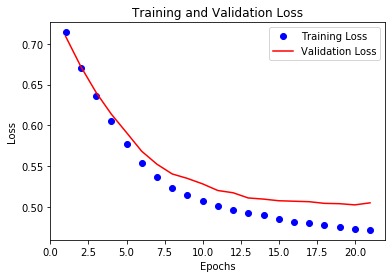

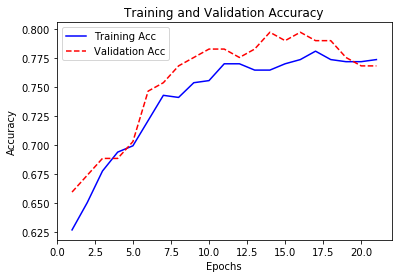

In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_loss", mode="min",
                   verbose=1)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=30, batch_size=10, 
          verbose=0, callbacks=[es])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_5b.py
* EarlyStopping
* es = EarlyStopping(monitor="val_loss", mode="min",verbose=1, patience=5)

Epoch 00032: early stopping
690/690 [==============================] - 0s 10us/step
訓練資料集的準確度 = 0.79
78/78 [==============================] - 0s 27us/step
測試資料集的準確度 = 0.77


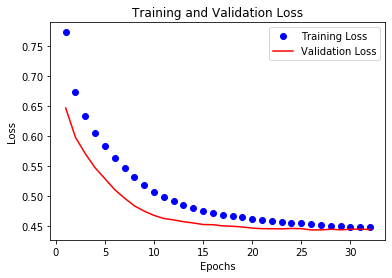

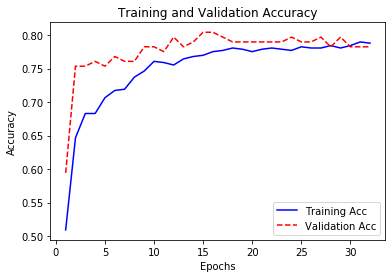

In [7]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_loss", mode="min",verbose=1, patience=5)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=50, batch_size=10, 
          verbose=0, callbacks=[es]) # input validation_split or validation_data
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_5c.py
* es = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=5)

Epoch 00020: early stopping
690/690 [==============================] - 0s 9us/step
訓練資料集的準確度 = 0.79
78/78 [==============================] - 0s 42us/step
測試資料集的準確度 = 0.78


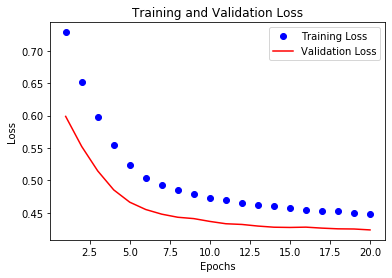

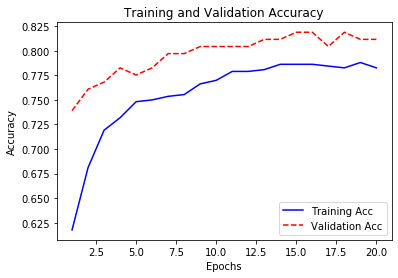

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_accuracy", mode="max",
                   verbose=1, patience=5)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=50, batch_size=10, 
          verbose=0, callbacks=[es])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_6.py
* mc = ModelCheckpoint("best_model.h5", monitor="val_acc", mode="max", verbose=1, save_best_only=True)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
mc = ModelCheckpoint("best_model.h5", monitor="val_acc", 
                     mode="max", verbose=1,
                     save_best_only=True)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=15, batch_size=10, 
          verbose=0, callbacks=[mc])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch14_6a.py
* model.load_weights("best_model.h5")

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.load_weights("best_model.h5")
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

### Ch14_6b.py
* EarlyStopping + ModelCheckpoint

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_loss", mode="min",
                   verbose=1)

from keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
filename = "weights-{epoch:02d}-{val_acc:.2f}.h5"
mc = ModelCheckpoint(filename, monitor="val_acc", 
                     mode="max", verbose=1,
                     save_best_only=True)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=20, batch_size=10, 
          verbose=0, callbacks=[es, mc])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()